**Grip:The Sparks Foundation**

**Data Science and Business Analyst Intern**

**Task1:Prediction using Supervised ML**

**Author: GORLE NETRA NANDINI**


In this task we have to predict the percentage of a student based on the number of studing hours.


**importing necessary libraries for Analysis**


In [21]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

**Reading Data**

In [22]:
url="http://bit.ly/w-data"
data=pd.read_csv(url)

**Exploring Data**

In [23]:
print(data.shape)
data.head(5)

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [24]:
data.info

<bound method DataFrame.info of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [25]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Checking whether duplicates are present**

In [26]:
data_dup=data.duplicated()
print("no.of duplicates:"+str(data_dup.sum))

no.of duplicates:<bound method NDFrame._add_numeric_operations.<locals>.sum of 0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
dtype: bool>


**Exploratory Data Analysis**

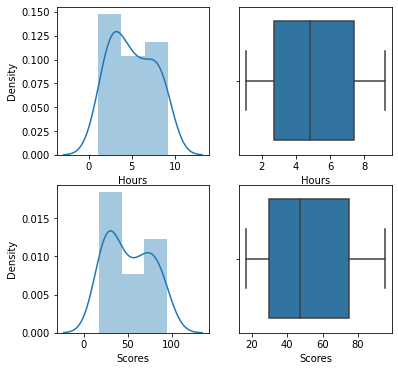

In [27]:
fig,axes=plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(6,6)

a=sb.distplot(data['Hours'],ax=axes[0][0])
b=sb.boxplot(data['Hours'],orient='v',ax=axes[0][1])
c=sb.distplot(data['Scores'],ax=axes[1][0])
d=sb.boxplot(data['Scores'],orient='v',ax=axes[1][1])
plt.show()

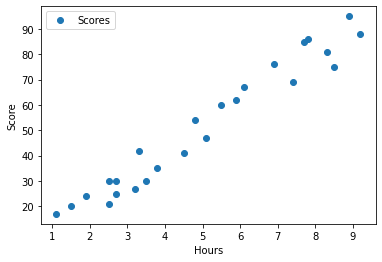

In [28]:
#Distribution of scores
data.plot(x='Hours',y='Scores',style='o')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

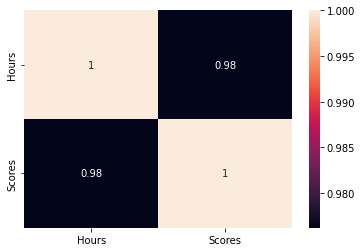

In [29]:
#checking Correlation
sb.heatmap(data.corr(),annot=True)
plt.show()

**Linear Regression**

In [30]:
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.75,random_state=7)

In [32]:
#Training linear regression model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
print('Training Completed.')

Training Completed.


**Ploting the Regression Line**

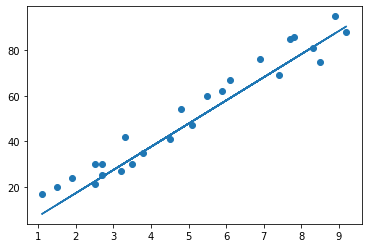

In [33]:
#Plotting the regression line
m=lr.coef_
c=lr.intercept_
line=m*x+c
plt.scatter(x,y)
plt.plot(x,line);
plt.show()

**Checking Accuracy**

In [34]:
#checking accuracy
print('Training Score:',lr.score(x_train,y_train)*100)
print('Testing Score:',lr.score(x_test,y_test)*100)

Training Score: 93.61295029446906
Testing Score: 92.46030866272214


**Predicting Scores**

In [35]:
#Predicting scores
y_pred=lr.predict(x_test)
print("y_pred:\n",+y_pred)


y_pred:
 [48.77966102 12.09975787 56.93075061 30.43970944 29.42082324 45.72300242
 24.32639225 22.28861985 42.66634383 22.28861985 67.11961259 90.55399516
 24.32639225 16.17530266 76.28958838 75.27070218 58.968523   81.38401937
  8.02421308]


**Actual vs Predicted Scores comparsion**

In [36]:
act_pred=pd.DataFrame({'Actual':y_test,'predicted':y_pred})
act_pred

,Actual,predicted
0,47,48.779661
1,20,12.099758
2,62,56.930751
3,42,30.439709
4,27,29.420823
5,54,45.723002
6,25,24.326392
7,30,22.288620
8,41,42.666344
9,21,22.288620


In [37]:
#predicting if a student is studying for 9.25 hours a day
hrs=9.25
own_pred=lr.predict([[hrs]])
print("Predicted Score={}".format(own_pred[0]))

Predicted Score=91.0634382566586


If a Student studies for 9.25 hours then he/she will score 91.0634382566586 that is nearly 91%

**MODEL EVALUATION**

In [38]:
from sklearn import metrics
print('Mean Absolute error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean squared error:',metrics.mean_squared_error(y_test,y_pred))

Mean Absolute error: 5.795310309672485
Mean squared error: 46.13748073553193


Since Mean Absolute error is less and since we have good R-square value,we can say that the model doing good.



**CONCLUSION**

we got the score around 91 for 9.25 studying hours per a day.

**END**